# **Prediksi Jumlah Partikel Jet dalam Tumbukan Proton-Proton**



Jet partikel adalah kumpulan partikel hadron (seperti pion, kaon) yang terbentuk ketika quark atau gluon yang terlepas dari tumbukan proton-proton dan mengalami hadronisasi yaitu proses di mana mereka mengikat diri dengan quark-antiquark baru dari vakum untuk membentuk hadron, akibat sifat confinement gaya kuat. Jet merepresentasikan arah dan energi quark/gluon asli, karena quark/gluon itu sendiri tidak pernah teramati secara langsung.

Adapun sumber literatur rujukannya sebagai berikut:

Sag, C.D. and Sahin, O. (2025) Predicting Jet Count in Proton-Proton Collisions using Machine Learning and Deep Learning Models, *Proceedings of the International Conference on Computer Science and Engineering*, Izmir Turk College Science. Available at: https://ieeexplore.ieee.org





#**Deskripsi Dataset**

Berkas ini berisi kejadian dari kumpulan data primer MultiJet dari rilis data terbuka CMS, dan menghitung variabel razor MR dan Rsq, yang digunakan dalam pencarian partikel supersimetris dalam LHC. Adapun sumber dataset sekunder ini diperoleh dari kaggle: <a href="https://www.kaggle.com/datasets/fedesoriano/multijet-primary-dataset/data">Predicting nJets Particle from Proton-Proton Collision<a/>.

Dataset berisikan 21.726 observasi dengan 17 fitur. Fitur-fitur diantaranya ialah:

1) Run: Nomor run dari event.
2) Lumi: Bagian lumi dari event.
3) Event: Nomor event dari event.
4) MR: Variabel kinematik silet pertama, variabel MR adalah estimasi skala massa keseluruhan, yang dalam batas produk peluruhan tak bermassa sama dengan massa partikel induk yang berat.
5) Rsq: Variabel kinematik silet kedua, variabel Rsq adalah kuadrat rasio R, yang mengkuantifikasi aliran energi dalam bidang tegak lurus terhadap balok dan pembagian momentum antara partikel tampak dan tak tampak.
6,7,8,9) E1,Px1,Py1,Pz1: Vektor keempat dari megajet terdepan (dengan momentum transversal terbesar).
10,11,12,13) ​​E2,Px2,Py2,Pz2: Vektor keempat dari megajet terdepan (dengan momentum transversal terbesar).
14) HT: Jumlah skalar momentum transversal jet.
15) MET: Besarnya jumlah vektor energi transversal partikel dalam peristiwa tersebut.
16) nJets: Jumlah jet dengan momentum transversal di atas 40 GeV.
17) nBJets: Jumlah jet berlabel b dengan momentum transversal di atas 40 GeV.

#**Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

#**Memuat Dataset**

In [14]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Capstone/MultiJetRun2010B.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Run,Lumi,Event,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nJets,nBJets
0,148029,388,302318745,215.553,0.031977,136.7100,-109.893,-54.03420,-58.9032,142.1790,70.0254,41.12250,-116.5130,203.666,18.31100,2,0
1,148029,388,302323641,155.437,0.042157,83.3865,81.150,6.88361,-12.9688,73.9025,-72.2472,11.88350,3.0899,154.659,14.77470,2,0
2,148029,388,302336217,400.563,0.026938,253.1840,139.902,102.64000,-101.9350,535.5510,-110.3790,-89.09290,-516.1790,343.280,25.22110,3,0
3,148029,388,302382289,286.245,0.094192,175.4860,-156.024,-62.95350,-47.7434,112.8510,89.0843,3.45025,67.9007,257.397,46.02880,2,0
4,148029,388,302403873,204.514,0.018804,833.7950,100.410,-16.65900,-827.4980,445.6120,-91.1991,15.55830,-390.1440,269.492,8.11345,3,0


#**Exploratory Data Analysis**

Pada tahap ini, Anda akan melakukan Exploratory Data Analysis (EDA) untuk memahami karakteristik dataset. EDA bertujuan untuk:

1.  **Memahami Struktur Data**

   Tinjau jumlah baris dan kolom dalam dataset.
Tinjau jenis data di setiap kolom (numerikal atau kategorikal).
2.  **Menangani Data yang Hilang**

   Identifikasi dan analisis data yang hilang (missing values). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.
3.  **Analisis Distribusi dan Korelasi**

   Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.
Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.
4.  **Visualisasi Data**

   Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.
Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.


Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21726 entries, 0 to 21725
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     21726 non-null  int64  
 1   Lumi    21726 non-null  int64  
 2   Event   21726 non-null  int64  
 3   MR      21726 non-null  float64
 4   Rsq     21726 non-null  float64
 5   E1      21726 non-null  float64
 6   Px1     21726 non-null  float64
 7   Py1     21726 non-null  float64
 8   Pz1     21726 non-null  float64
 9   E2      21726 non-null  float64
 10  Px2     21726 non-null  float64
 11  Py2     21726 non-null  float64
 12  Pz2     21726 non-null  float64
 13  HT      21726 non-null  float64
 14  MET     21726 non-null  float64
 15  nJets   21726 non-null  int64  
 16  nBJets  21726 non-null  int64  
dtypes: float64(12), int64(5)
memory usage: 2.8 MB


Tidak ada missing value

In [12]:
duplicate_rows = df[df.duplicated()]
print(f'Jumlah data duplikat: {duplicate_rows.shape[0]}')
print(duplicate_rows)

Jumlah data duplikat: 0
Empty DataFrame
Columns: [MR, Rsq, E1, Px1, Py1, Pz1, E2, Px2, Py2, Pz2, HT, MET, nJets, nBJets]
Index: []


Tidak ada data duplikat

In [16]:
df.describe()

,Run,Lumi,Event,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nJets,nBJets
count,21726.000000,21726.000000,2.172600e+04,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000
mean,148666.049710,900.693501,8.635646e+08,351.981435,0.023253,297.178955,0.283289,0.764211,-8.523257,277.410117,-0.399385,-0.909938,-1.915512,242.328342,16.005371,2.435791,0.053668
std,596.085618,496.482684,4.786516e+08,193.691363,0.023291,224.040020,91.701247,90.770124,341.366770,206.890743,76.720135,75.758491,321.415092,78.841528,10.797882,0.655750,0.236334
min,147926.000000,388.000000,3.023155e+08,29.999900,0.000009,44.947600,-543.821000,-648.385000,-2022.310000,42.048600,-700.112000,-459.801000,-1647.600000,120.938000,0.100445,2.000000,0.000000
25%,148029.000000,463.000000,4.976106e+08,229.790750,0.007907,143.531000,-78.472975,-75.770000,-151.347750,126.916250,-63.333250,-62.706450,-154.231750,193.252000,8.626845,2.000000,0.000000
50%,149181.000000,986.000000,9.709389e+08,292.911000,0.016817,212.060500,-0.310509,1.238670,-5.478110,204.140000,-0.548208,-1.900460,-1.803295,223.696000,14.035000,2.000000,0.000000
75%,149181.000000,999.000000,9.844834e+08,406.883000,0.031612,374.542750,78.562475,77.738075,135.345250,366.710500,62.852025,61.111550,151.167750,269.241500,21.091050,3.000000,0.000000
max,149181.000000,1804.000000,1.703645e+09,2433.820000,0.763695,2101.580000,722.291000,470.234000,2061.890000,1843.360000,405.326000,635.734000,1830.370000,1462.630000,423.144000,7.000000,2.000000


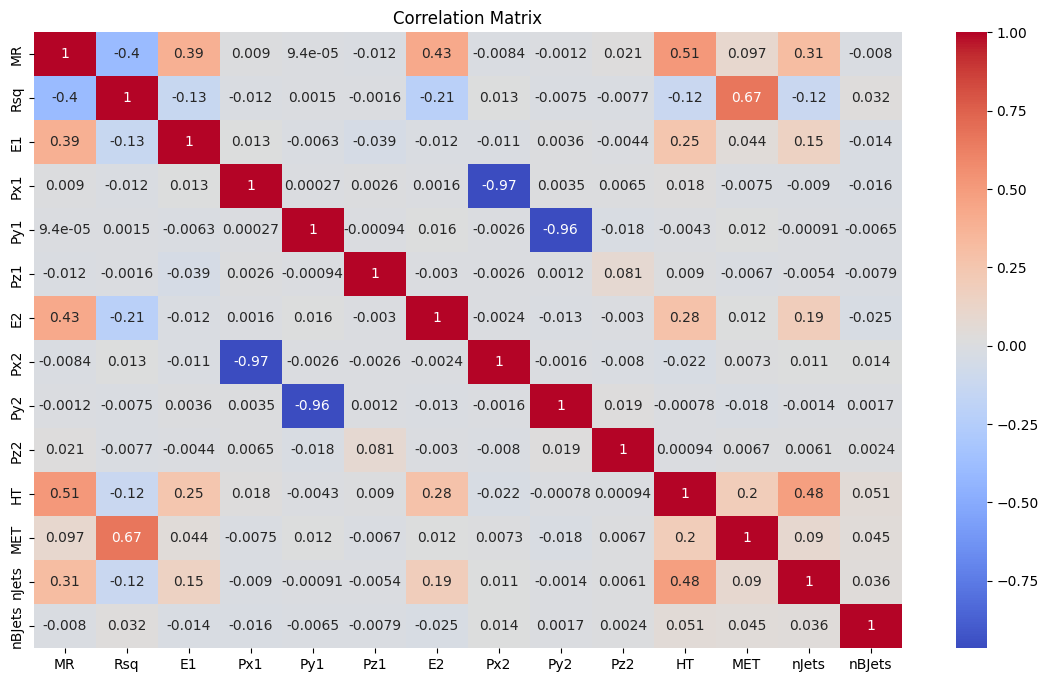

In [17]:
df.drop(columns=['Run', 'Lumi', 'Event'], inplace=True)

plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Menghapus kolom Run, Lumi, dan Event karena hanya unique value dan tidak berdampak pada analisa model

In [18]:
X = df.drop(columns=['nJets', 'Pz1', 'Pz2', 'nBJets'],axis=1)
y = df['nJets']

Memisahkan fitur dan target, serta menghapus fitur pz1 dan pz2 karena tidak berkontribusi, serta fitur nBjets karena tidak terlalu penting (lihat bagian feature importance)

In [19]:
#Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled.head()

,MR,Rsq,E1,Px1,Py1,E2,Px2,Py2,HT,MET
0,-0.704376,0.374542,-0.716268,-1.201498,-0.603719,-0.653650,0.917965,0.554834,-0.490392,0.213531
1,-1.014753,0.811629,-0.954282,0.881870,0.067418,-0.983670,-0.936514,0.168875,-1.111995,-0.113976
2,0.250825,0.158223,-0.196375,1.522574,1.122375,1.247745,-1.433550,-1.164028,1.280467,0.853495
3,-0.339395,3.045827,-0.543188,-1.704567,-0.701984,-0.795410,1.166392,0.057555,0.191130,2.780556
4,-0.761370,-0.191034,2.395235,1.091905,-0.191953,0.813017,-1.183546,0.217383,0.344543,-0.730894


In [20]:
smote = SMOTE(k_neighbors=2, random_state=42)
x_resampled, y_resampled = smote.fit_resample(X_scaled, y)

Melakukan oversampling pada data target yakni nJets agar data tidak bias dalam memprediksi

#**Modeling**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [22]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Melakukan pemodelan dengan Random Forest dan KNN secara langsung (sederhana)

#**Evaluasi dan Visualisasi**

Classification report:
               precision    recall  f1-score   support

           2       0.90      0.83      0.87      2800
           3       0.85      0.87      0.86      2800
           4       0.95      0.99      0.97      2801
           5       1.00      1.00      1.00      2801
           6       1.00      1.00      1.00      2801
           7       1.00      1.00      1.00      2800

    accuracy                           0.95     16803
   macro avg       0.95      0.95      0.95     16803
weighted avg       0.95      0.95      0.95     16803



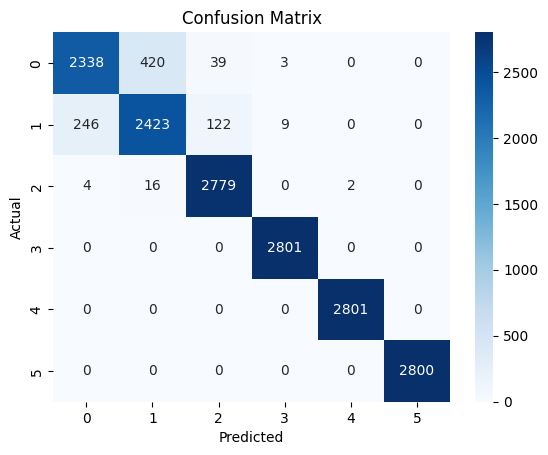

In [24]:
y_pred = rfc.predict(X_test)

print("Classification report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt= 'd' ,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Hasil evaluasi dari pemodelan sederhana random forest menunjukkan hasil yang baik, namun untuk nJet partikel berjumlah 2 dan 3 hasil prediksi True Possitive cukup berbeda walaupun tidak signifikan terhadap prediksi jet partikel 3, 4, 5, 6 ,dan 7. Dimana kesalahan prediksi jet partikel berjumlah satu malah diprediksi ke partikel jet berjumlah 2 dan sedikit ke berjumlah 3. Sedangkan prediksi jet partikel berjumlah 2 sebagian besar salah prediksi ke jet partikel berjumlah 1 dan sedikit ke berjumlah 3

Classification report:
               precision    recall  f1-score   support

           2       0.86      0.70      0.77      2800
           3       0.77      0.80      0.78      2800
           4       0.89      1.00      0.94      2801
           5       0.98      1.00      0.99      2801
           6       1.00      1.00      1.00      2801
           7       1.00      1.00      1.00      2800

    accuracy                           0.92     16803
   macro avg       0.92      0.92      0.91     16803
weighted avg       0.92      0.92      0.91     16803



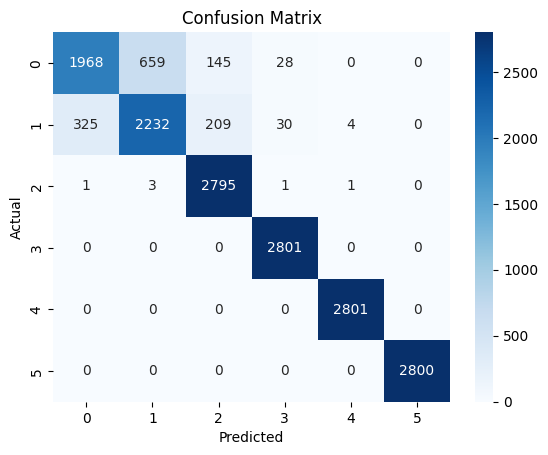

In [25]:
y_preds = knn.predict(X_test)

print("Classification report:\n", classification_report(y_test, y_preds))
sns.heatmap(confusion_matrix(y_test,y_preds), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#**Tuning Hyperparameter Model**

In [47]:
 param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Melakukan tuning hyperparameter untuk model Random Forest dengan harapan hasil evaluasi akan menunjukkan persentase True Possitive yang lebih baik

In [34]:
rfc_tuning = RandomForestClassifier(
    n_estimators=200,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    bootstrap = False
)

rfc_tuning = rfc_tuning.fit(X_train, y_train)

In [35]:
y_predict = rfc_tuning.predict(X_test)
print('Classification report:\n', classification_report(y_test, y_predict))

Classification report:
               precision    recall  f1-score   support

           2       0.91      0.87      0.89      2800
           3       0.88      0.89      0.88      2800
           4       0.96      0.99      0.98      2801
           5       1.00      1.00      1.00      2801
           6       1.00      1.00      1.00      2801
           7       1.00      1.00      1.00      2800

    accuracy                           0.96     16803
   macro avg       0.96      0.96      0.96     16803
weighted avg       0.96      0.96      0.96     16803



Hasil evaluasi setelah tuning hyperparameter ternyata tidak mengubah hasil evaluasi dengan tanpa tuning (ketika bootstrap = True), tetapi mengubah secara keseluruhan precision, recall, dan f1-score pada partikel 2,3, dan 4 serta accuracy nya (ketika bootstrap = False)

#**Feature Selection**


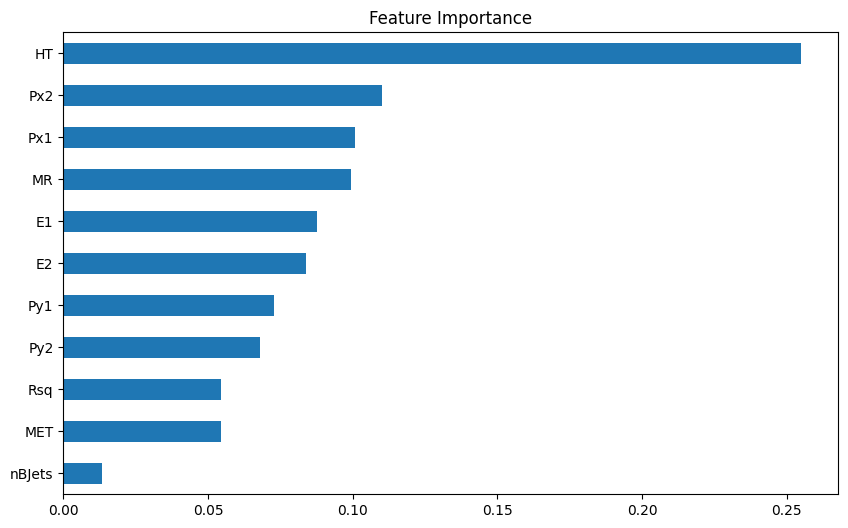

In [53]:
importances = pd.Series(rfc.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6), title='Feature Importance')
plt.show()

#**Modeling XGBoost**

In [38]:
y_train_shifted = y_train - 2
y_test_shifted = y_test - 2

variabel model target (y) kita ubah dan buat label target menjadi dimulai dari 0 karena XGBoost mengharapkan label klasifikasi berupa integer dari 0 sampai n_classes - 1

In [44]:
xgb = XGBClassifier( random_state=42)
xgb.fit(X_train, y_train_shifted)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [45]:
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb = y_pred_xgb + 2

In [43]:
print('Classification report:\n', classification_report(y_test, y_pred_xgb))

Classification report:
               precision    recall  f1-score   support

           2       0.88      0.88      0.88      2800
           3       0.83      0.74      0.78      2800
           4       0.86      0.93      0.89      2801
           5       0.97      1.00      0.98      2801
           6       1.00      1.00      1.00      2801
           7       1.00      1.00      1.00      2800

    accuracy                           0.92     16803
   macro avg       0.92      0.92      0.92     16803
weighted avg       0.92      0.92      0.92     16803



Hasil evaluasi dari model sederhana (tanpa hyperparameter) XGBoost terlihat belum cukup baik. khusus untuk prediksi jet partikel berjumlah 1 dan 2 serta 3

#**Tuning Model XGBoost**

In [46]:
params = {
    'max_depth': [3, 5, 7],
    'Learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

grid_search_xgb = GridSearchCV(xgb, params, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train_shifted)
best_params_xgb = grid_search_xgb.best_params_
print('Best Parameters:', best_params_xgb)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:42:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "Learning_rate" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'Learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300}


In [47]:
xgb_tuned = XGBClassifier(
    max_depth=best_params_xgb['max_depth'],
    Learning_rate=best_params_xgb['Learning_rate'],
    n_estimators=best_params_xgb['n_estimators'],
    random_state=42
)

xgb_tuned.fit(X_train, y_train_shifted)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:49:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "Learning_rate" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(Learning_rate=0.01, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [49]:
y_pred_xgb_tuned = xgb_tuned.predict(X_test)
y_pred_xgb_tuned = y_pred_xgb_tuned + 2

classification_report_xgb_tuned = classification_report(y_test, y_pred_xgb_tuned)
print('Classification report:\n', classification_report_xgb_tuned)

Classification report:
               precision    recall  f1-score   support

           2       0.91      0.90      0.91      2800
           3       0.89      0.86      0.88      2800
           4       0.94      0.99      0.96      2801
           5       1.00      1.00      1.00      2801
           6       1.00      1.00      1.00      2801
           7       1.00      1.00      1.00      2800

    accuracy                           0.96     16803
   macro avg       0.96      0.96      0.96     16803
weighted avg       0.96      0.96      0.96     16803

